In [1]:
import pandas as pd
import numpy as np
import glob
import sys
import os
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#데이터 파일 한번에 여러개 불러오기

Cus_Info=pd.DataFrame()

for f in glob.glob("C:\\Users\\didrn\\OneDrive\\바탕 화면\\아이펠리.xlsx\\2*.xlsx"):
    data = pd.read_excel(f, engine = 'openpyxl')

    columns = ['결제일자','품목명','품목코드','수량','수취인','주소']
    df = pd.DataFrame(data, columns=columns)
    Cus_Info = Cus_Info.append(df, ignore_index=True)

Cus_Info.dropna(inplace = True) #결측치 제거
Cus_Info = Cus_Info[~Cus_Info['주소'].str.contains("주소", na=False, case=False)] #잘못된 데이터가 포함된 행 제거
Cus_Info = Cus_Info.drop_duplicates() #중복되는 행 제거
idx_nm = Cus_Info[Cus_Info['결제일자'] == '스마트스토어'].index
Cus_Info = Cus_Info.drop(idx_nm)

In [4]:
Cus_Info.to_excel("C:\\Users\\didrn\\OneDrive\\바탕 화면\\Cus_data.xlsx", header=True, index=False)
#바탕화면에 병합된 하나의 파일로 저장

In [5]:
#재구매율 구하기

def repurchase_rate(df, target_code):
    
    case = df[df.품목코드 == str(target_code)]

    group = case.groupby('주소')['결제일자'].nunique()
    #같은 주소 기준 결제일자로 그룹화

    buy_total = len([i for i in case.품목코드]) # 중복을 제거한 구매횟수
    buy_2 = 0
    buy_over = 0

    for i in group:
        if i == 1:
            pass
        elif i == 2:
            buy_2 += 1
        else:
            buy_over += 1

    rebuy_2 = buy_2 / buy_total * 100
    rebuy_over = buy_over / buy_total * 100
    
    target_name = Cus_Info.품목명[Cus_Info.품목코드 == target_code].unique()[0]
    
    result = [target_name, rebuy_2, rebuy_over]
    
    return result 

In [6]:
df2020_2 = pd.read_excel("C:\\Users\\didrn\\OneDrive\\바탕 화면\\분기별 데이터\\2020년 2분기.xlsx", engine = 'openpyxl')
df2020_3 = pd.read_excel("C:\\Users\\didrn\\OneDrive\\바탕 화면\\분기별 데이터\\2020년 3분기.xlsx", engine = 'openpyxl')
df2020_4 = pd.read_excel("C:\\Users\\didrn\\OneDrive\\바탕 화면\\분기별 데이터\\2020년 4분기.xlsx", engine = 'openpyxl')
df2021_1 = pd.read_excel("C:\\Users\\didrn\\OneDrive\\바탕 화면\\분기별 데이터\\2021년 1분기.xlsx", engine = 'openpyxl')
df2021_2 = pd.read_excel("C:\\Users\\didrn\\OneDrive\\바탕 화면\\분기별 데이터\\2021년 2분기.xlsx", engine = 'openpyxl')
df2021_3 = pd.read_excel("C:\\Users\\didrn\\OneDrive\\바탕 화면\\분기별 데이터\\2021년 3분기.xlsx", engine = 'openpyxl')

df0 = pd.merge(df2020_2, df2020_3, how = 'outer')
df1 = pd.merge(df2020_4, df2021_1, how = 'outer')
df2 = pd.merge(df2021_2, df2021_3, how = 'outer')

Text(0.5, 1.0, '애플펜슬 팁커버 기본')

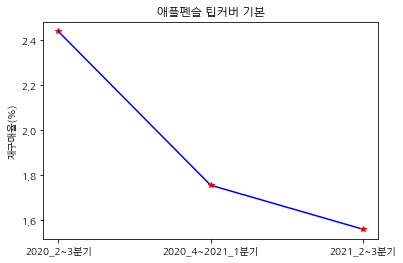

In [62]:
x = ["2020_2~3분기","2020_4~2021_1분기", "2021_2~3분기"]
y = [repurchase_rate(df0, "A0001")[1],
    repurchase_rate(df1, "A0001")[1],
    repurchase_rate(df2, "A0001")[1]]

plt.plot(x, y, color = 'b', marker = '*', markeredgecolor = 'red' )
plt.ylabel('재구매율(%)')
plt.title("애플펜슬 팁커버 기본")

Text(0.5, 1.0, '애플펜슬 팁커버 저마찰')

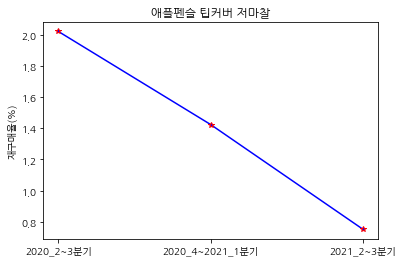

In [60]:
x = ["2020_2~3분기","2020_4~2021_1분기", "2021_2~3분기"]
y = [repurchase_rate(df0, "A0002")[1],
    repurchase_rate(df1, "A0002")[1],
    repurchase_rate(df2, "A0002")[1]]

plt.plot(x, y, color = 'b',marker = '*', markeredgecolor = 'red')
plt.ylabel('재구매율(%)')
plt.title("애플펜슬 팁커버 저마찰")

In [12]:
#재구매 주기 리스트 구하기
def term_list(target_code): #target_code에 조사하고 싶은 품목코드 입력
    if target_code == "all":
        case = Cus_Info

    else:
        case = Cus_Info[Cus_Info.품목코드 == target_code]

    group = case.groupby('주소')['결제일자']

    a = {}

    for i,j in group:
        a[i] = j

    term_list = []

    for i in a.values():
        if i.count() == 2:

            dt1 = dt.datetime(int(str(i).split()[1].split("-")[0]),
                      int(str(i).split()[1].split("-")[1]),
                      int(str(i).split()[1].split("-")[2]))
            dt2 = dt.datetime(int(str(i).split()[4].split("-")[0]),
                      int(str(i).split()[4].split("-")[1]),
                      int(str(i).split()[4].split("-")[2]))

            term = dt2 - dt1
            term_list.append(abs(term.days))

    return term_list

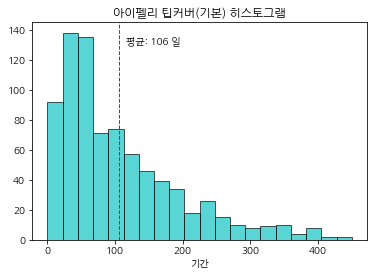

In [41]:
a = term_list("A0001")
avg = sum(a)/len(a)

plt.hist(a, bins = 20, color = 'c', edgecolor = 'k', alpha = 0.65)
plt.title("아이펠리 팁커버(기본) 히스토그램")
plt.xlabel('기간')
plt.axvline(avg, color = 'r', linestyle = 'dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(avg*1.1, max_ylim*0.9, '평균: %d 일' %(avg))
plt.show()

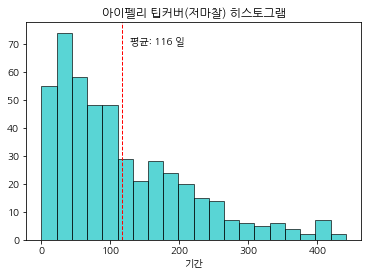

In [43]:
b = term_list("A0002")
avg_b = sum(b)/len(b)

plt.hist(b, bins = 20, color = 'c', edgecolor = 'k', alpha = 0.65)
plt.title("아이펠리 팁커버(저마찰) 히스토그램")
plt.xlabel('기간')
plt.axvline(avg_b, color = 'r', linestyle = 'dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(avg_b*1.1, max_ylim*0.9, '평균: %d 일' %(avg_b))
plt.show()